In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [125]:
df = pd.read_csv("supermarket_sales.csv")

In [127]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Number of Record

In [130]:
df.shape

(999, 17)

In [132]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000
mean,55.653093,5.508509,15.368596,322.740518,307.371922,4.761905e+00,15.368596,6.970571
std,26.501055,2.924514,11.709731,245.904345,234.194615,6.131501e-14,11.709731,1.718121
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,32.850000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.070000,5.000000,12.080000,253.680000,241.600000,4.761905e+00,12.080000,7.000000
75%,77.940000,8.000000,22.429000,471.009000,448.580000,4.761905e+00,22.429000,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


In [134]:
df['Customer type'].nunique()


2

In [136]:
df['Customer type'].value_counts()


Customer type
Member    500
Normal    499
Name: count, dtype: int64

In [138]:
df['Branch'].value_counts()


Branch
A    339
B    332
C    328
Name: count, dtype: int64

In [140]:
df['City'].value_counts()


City
Yangon       339
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [142]:
df['Product line'].value_counts()


Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         151
Name: count, dtype: int64

In [144]:
df['Payment'].value_counts()


Payment
Cash           344
Ewallet        344
Credit card    311
Name: count, dtype: int64

# III. Data Types of Combination

In [147]:
import pandas as pd

# Load the dataset
data = pd.read_csv('supermarket_sales.csv')

# Categorizing columns based on data types
binary_cols = []
nominal_cols = []
categorical_cols = []
textual_cols = []
numerical_cols = []

for column in data.columns:
    unique_values = data[column].nunique()
    if data[column].dtype == 'object':
        if unique_values == 2:
            binary_cols.append(column)  # Binary must have exactly two unique values
        elif data[column].str.isnumeric().all():
            nominal_cols.append(column)  # Nominal data are categorical data without a set order.
        else:
            textual_cols.append(column)  # Textual columns are assumed to be non-numeric strings
    elif data[column].dtype in ['int64', 'float64']:
        if unique_values == 2:
            binary_cols.append(column)  # Numeric columns with exactly two unique values
        elif unique_values < 20:
            categorical_cols.append(column)  # Categorical if fewer distinct numbers
        else:
            numerical_cols.append(column)  # Numerical columns with many unique values

# Printing the categorized columns
print("Binary Columns:", binary_cols)
print("Nominal Columns:", nominal_cols)
print("Categorical Columns:", categorical_cols)
print("Textual Columns:", textual_cols)
print("Numerical Columns:", numerical_cols)


Binary Columns: ['Customer type', 'Gender']
Nominal Columns: []
Categorical Columns: ['Quantity', 'gross margin percentage']
Textual Columns: ['Invoice ID', 'Branch', 'City', 'Product line', 'Date', 'Time', 'Payment']
Numerical Columns: ['Unit price', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']


# V. Data Cleaning

### a.Number and proportion of irrelevant predictive/independent variables removed


In [151]:
import pandas as pd

# Load the dataset
data = pd.read_csv('supermarket_sales.csv')

# Display initial columns to identify potential irrelevant ones
print("Initial columns:", data.columns.tolist())


irrelevant_columns = ['Invoice ID', 'Date']  # Example of columns you might consider irrelevant

# Remove these columns
data_cleaned = data.drop(columns=irrelevant_columns)

# Display updated DataFrame to confirm removal
print("Columns after removal of irrelevant ones:", data_cleaned.columns.tolist())

# Save the cleaned dataset if necessary
# data_cleaned.to_csv('/mnt/data/supermarket_sales_cleaned.csv', index=False)


Initial columns: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
Columns after removal of irrelevant ones: ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


### b. Remove duplicates:

In [154]:
import pandas as pd

# Load the dataset
data = pd.read_csv('supermarket_sales.csv')

# Display the initial number of records in the dataset
print("Initial number of records:", data.shape[0])

# Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Calculate the number of duplicates removed
num_duplicates_removed = data.shape[0] - data_cleaned.shape[0]

# Display the number of duplicates removed and the new size of the dataset
print("Number of duplicates removed:", num_duplicates_removed)
print("Number of records after duplicates removed:", data_cleaned.shape[0])

# Optionally, save the cleaned data to a new file
# data_cleaned.to_csv('/mnt/data/supermarket_sales_no_duplicates.csv', index=False)


Initial number of records: 999
Number of duplicates removed: 0
Number of records after duplicates removed: 999


### c. Dimensionality reduction based on PCA/OLS and self-observation;

In [162]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

# Load the data
data = pd.read_csv('supermarket_sales.csv')  # Adjust the path as needed

# Select categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.drop(['Invoice ID', 'Date', 'Time'])
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop(['Tax 5%', 'Total', 'gross income'])

# Define the transformers for the pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the PCA
pca = PCA(n_components=15)  # Adjust the number of components as needed

# Create the complete pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', pca)])

# Fit and transform the data
X_pca = pipeline.fit_transform(data)

# Prepare the target variable
y = data['Rating']  # Assuming 'Rating' is the dependent variable

# Add a constant to the predictors
X_pca_sm = sm.add_constant(X_pca)

# Fit the OLS model
model = sm.OLS(y, X_pca_sm)
results = model.fit()

# Print the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.313e+31
Date:                Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                        19:02:06   Log-Likelihood:                 32338.
No. Observations:                 999   AIC:                        -6.464e+04
Df Residuals:                     983   BIC:                        -6.456e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9706   6.75e-17   1.03e+17      0.0

### d.Missing Values

In [160]:
import pandas as pd

# Load the dataset
data = pd.read_csv('supermarket_sales.csv')

# Display the initial number of records and columns
print("Initial dataset shape:", data.shape)

# Check for any missing values
print("Missing values in each column:\n", data.isnull().sum())

# Handling missing values
# Filling numerical missing values with the median
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Filling categorical missing values with the mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)

# Re-check for any missing values
print("Missing values after handling:\n", data.isnull().sum())

# Optionally, save the cleaned data to a new file
# data.to_csv('/mnt/data/supermarket_sales_cleaned.csv', index=False)


Initial dataset shape: (999, 17)
Missing values in each column:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64
Missing values after handling:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                

### f. Outlier detection and handling:

In [23]:
import pandas as pd
from scipy import stats

# Load the dataset
data = pd.read_csv('supermarket_sales.csv')

# Display the initial number of records
print("Initial dataset shape:", data.shape)

# Identifying numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Detecting outliers using Z-score
# We consider data points that have a Z-score less than -3 or greater than 3 as outliers
z_scores = stats.zscore(data[numerical_cols])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_cleaned = data[filtered_entries]

# Display the new number of records after removing outliers
print("Dataset shape after removing outliers:", data_cleaned.shape)

# Optionally, save the cleaned data to a new file
# data_cleaned.to_csv('/mnt/data/supermarket_sales_cleaned_no_outliers.csv', index=False)


Initial dataset shape: (999, 17)
Dataset shape after removing outliers: (0, 17)


# VI. Data Normalization and visulization 

In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('supermarket_sales.csv')

# Identifying numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display a few rows to confirm normalization
print(data[numerical_cols].head())

# Optionally, save the normalized data to a new file
# data.to_csv('/mnt/data/supermarket_sales_normalized.csv', index=False)


   Unit price  Quantity    Tax 5%     Total      cogs  \
0    0.870717  0.666667  0.618835  0.618835  0.618835   
1    0.057855  0.444444  0.067387  0.067387  0.067387   
2    0.403316  0.666667  0.319628  0.319628  0.319628   
3    0.535603  0.777778  0.463549  0.463549  0.463549   
4    0.848131  0.666667  0.604377  0.604377  0.604377   

   gross margin percentage  gross income    Rating  
0                      0.0      0.618835  0.433333  
1                      0.0      0.067387  0.933333  
2                      0.0      0.319628  0.566667  
3                      0.0      0.463549  0.733333  
4                      0.0      0.604377  0.216667  


In [25]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


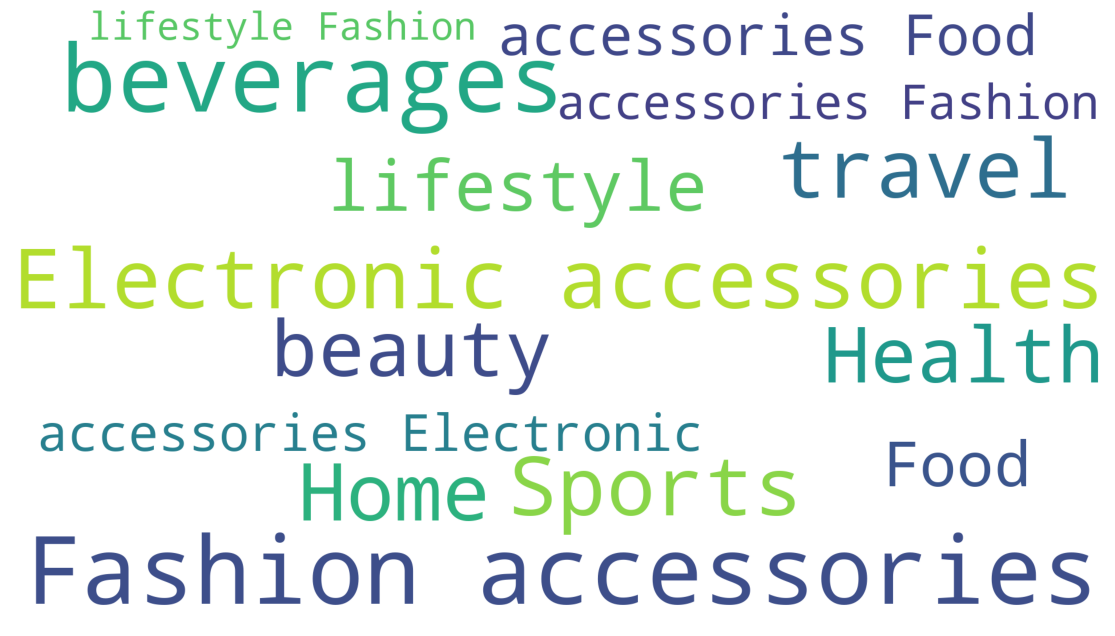

In [26]:
from wordcloud import WordCloud
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(df['Product line']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

In [27]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

<Axes: xlabel='Unit price', ylabel='Rating'>

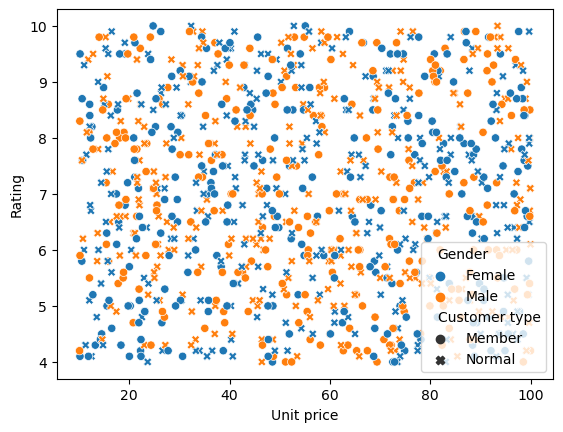

In [28]:
sns.scatterplot(data=df, x='Unit price', y='Rating',hue='Gender',style='Customer type')

<Axes: xlabel='gross income'>

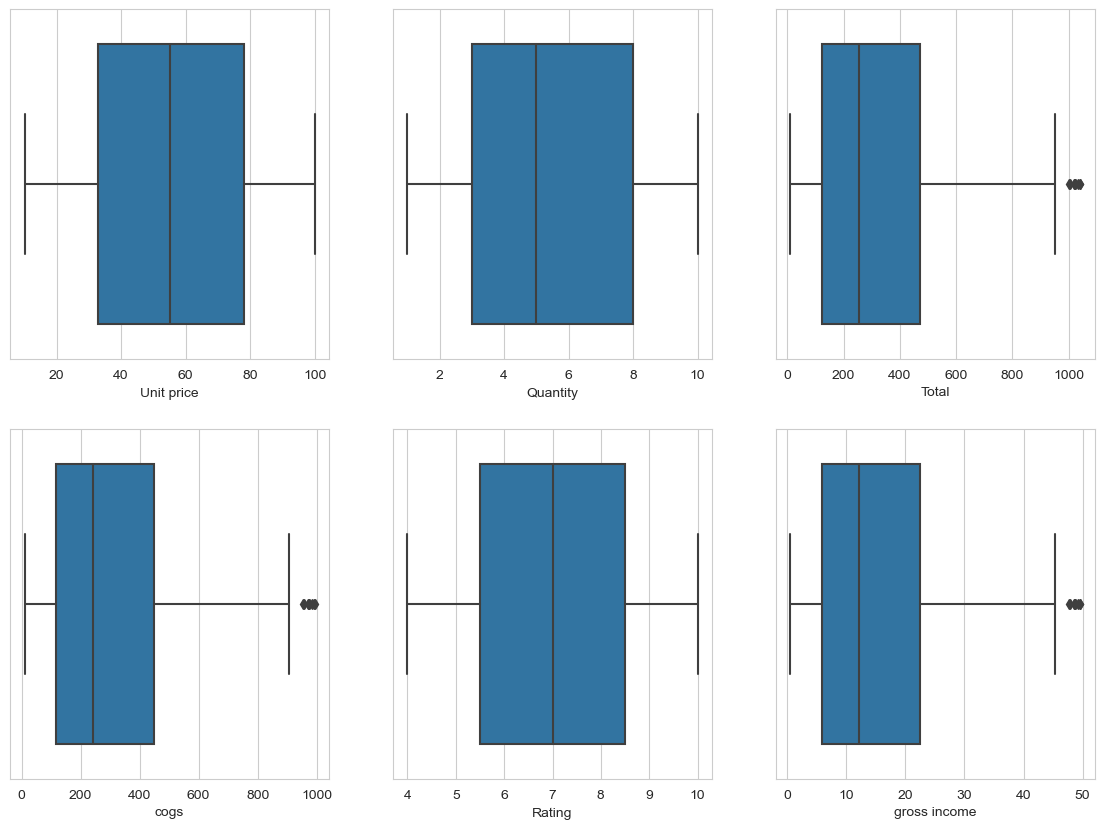

In [29]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=df)

<Axes: xlabel='gross income', ylabel='Density'>

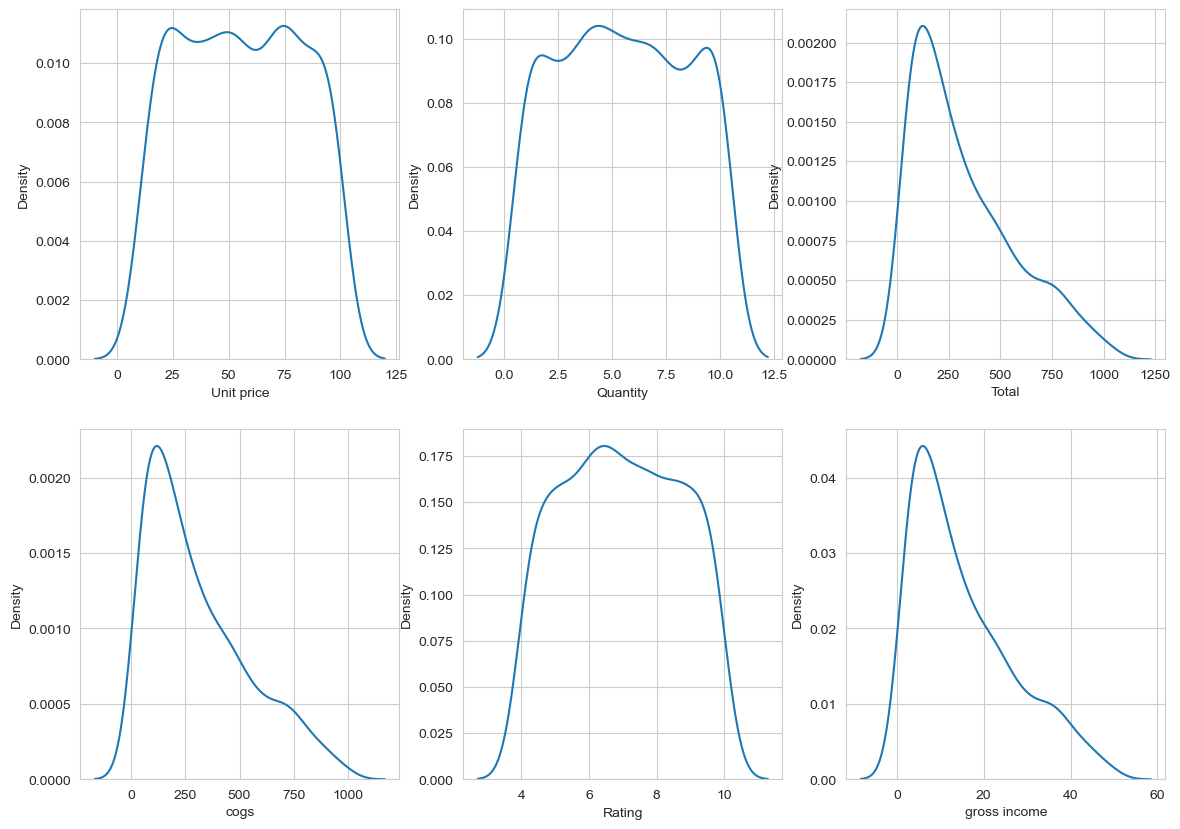

In [30]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.kdeplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sns.kdeplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.kdeplot(x='Total',data=df)
plt.subplot(2,3,4)
sns.kdeplot(x='cogs',data=df)
plt.subplot(2,3,5)
sns.kdeplot(x='Rating',data=df)
plt.subplot(2,3,6)
sns.kdeplot(x='gross income',data=df)

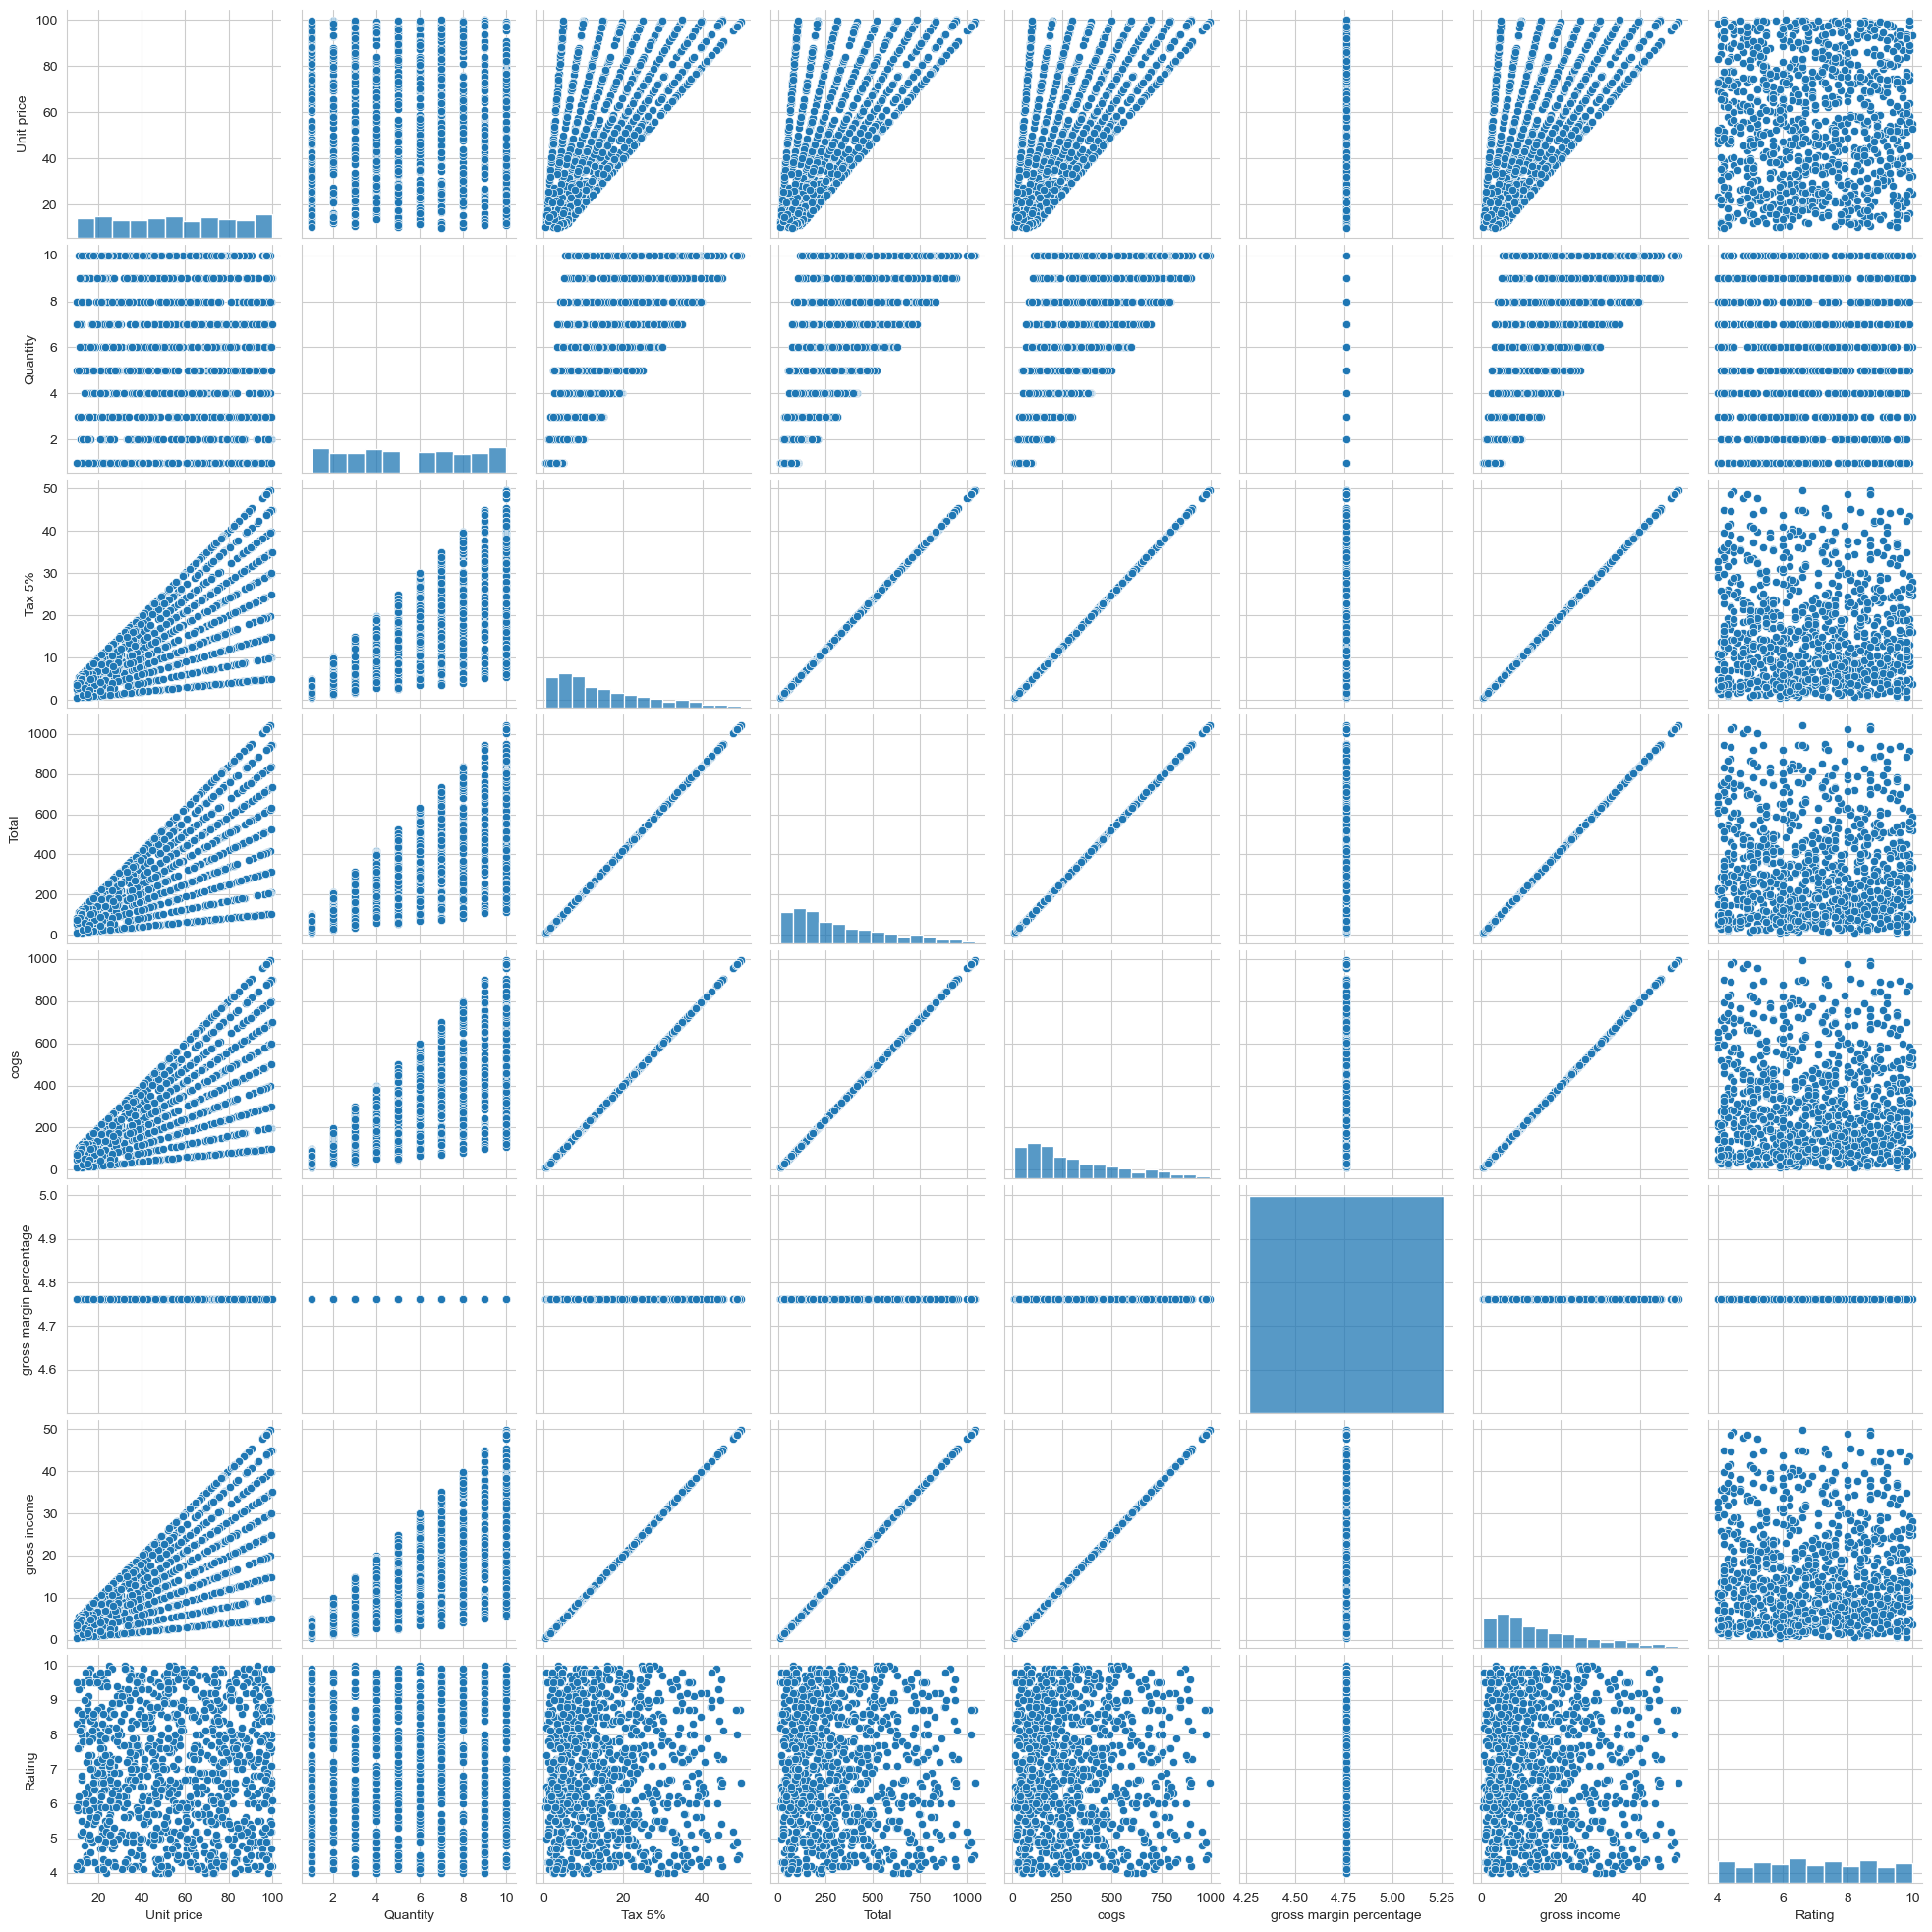

In [31]:
sns.pairplot(data=df)


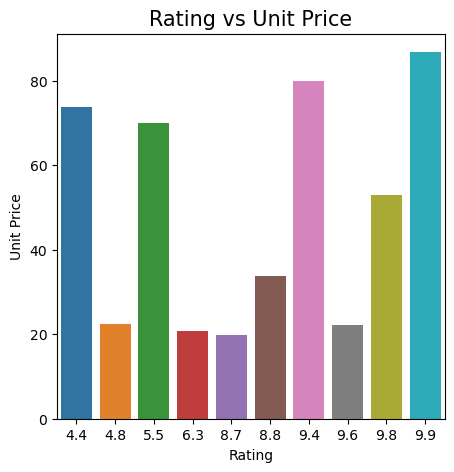

In [32]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Unit price", data=df[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

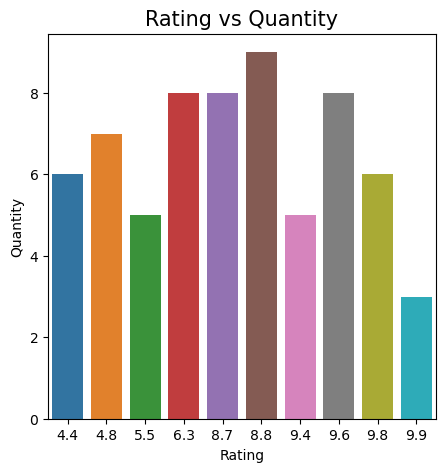

In [33]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=df[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

In [34]:
# Compute correlation matrix only for numeric columns
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                         Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.010415  0.633733  0.633733  0.633733   
Quantity                   0.010415  1.000000  0.705431  0.705431  0.705431   
Tax 5%                     0.633733  0.705431  1.000000  1.000000  1.000000   
Total                      0.633733  0.705431  1.000000  1.000000  1.000000   
cogs                       0.633733  0.705431  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.633733  0.705431  1.000000  1.000000  1.000000   
Rating                    -0.009678 -0.016462 -0.037627 -0.037627 -0.037627   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.633733 -0.009678  
Quantity                                     NaN      0.705431 -0.016462  
Tax 5%                                       NaN      1.000000 

<Axes: >

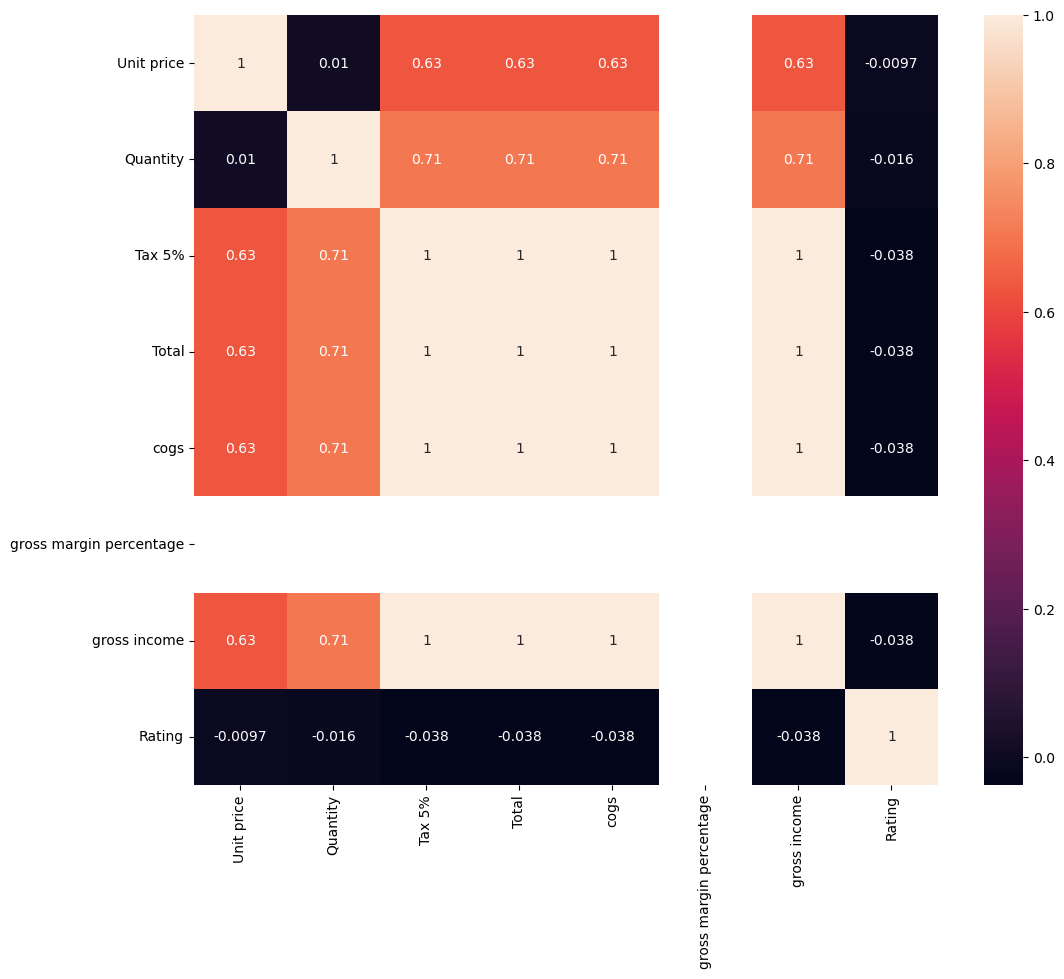

In [35]:
plt.figure(figsize = (12,10))

sns.heatmap(numeric_df.corr(), annot =True)

In [36]:
#lets find the categorialfeatures
list_1=list(df.columns)

In [37]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [38]:
le=LabelEncoder()

In [39]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [40]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,934,0,2,0,0,1,88.34,7,30.9190,649.2990,60,160,0,618.38,4.761905,30.9190,6.6
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,31,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,26,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,50,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,19,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,689,2,1,0,0,0,60.95,1,3.0475,63.9975,60,79,2,60.95,4.761905,3.0475,5.9
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,52,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,25,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,20,154,0,31.84,4.761905,1.5920,7.7


# VII.Data Balancing


In [42]:
y=df['Gender']
x=df.drop('Gender',axis=1)

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

print("Number of samples in training dataset:", x_train.shape[0])
print("Number of samples in testing dataset:", x_test.shape[0])

print("Number of samples in training dataset:", y_train.shape[0])
print("Number of samples in testing dataset:", y_test.shape[0])



Number of samples in training dataset: 799
Number of samples in testing dataset: 200
Number of samples in training dataset: 799
Number of samples in testing dataset: 200


### KNN USING SK-LEARN

In [44]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [45]:
y_pred=knn.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.46      0.45      0.46        99
           1       0.47      0.48      0.47       101

    accuracy                           0.47       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.47      0.46       200

Confusion Matrix:
 [[45 54]
 [53 48]]
Training Score:
 65.20650813516896


### KNN USING PYTORCH

In [99]:
pip install torch torchvision


Note: you may need to restart the kernel to use updated packages.


In [103]:
import torch

# Mock data setup
# Assuming a binary classification with classes 0 and 1
y_test = torch.tensor([0, 1, 1, 0, 1])  # True labels
y_pred = torch.tensor([0, 0, 1, 0, 1])  # Predicted labels by your model



In [105]:
import torch

def calculate_metrics_pytorch(y_true, y_pred):
    # Convert to one-hot encoding if not already
    if len(y_true.shape) == 1:
        y_true_onehot = torch.nn.functional.one_hot(y_true.long(), num_classes=torch.max(y_true).item() + 1)
    else:
        y_true_onehot = y_true

    if len(y_pred.shape) == 1:
        y_pred_onehot = torch.nn.functional.one_hot(y_pred.long(), num_classes=torch.max(y_pred).item() + 1)
    else:
        y_pred_onehot = y_pred

    true_positives = torch.sum(y_true_onehot * y_pred_onehot, dim=0)
    predicted_positives = torch.sum(y_pred_onehot, dim=0)
    actual_positives = torch.sum(y_true_onehot, dim=0)

    precision = true_positives / predicted_positives
    recall = true_positives / actual_positives
    f1 = 2 * precision * recall / (precision + recall)

    # Accuracy
    accuracy = torch.sum(y_true == y_pred).float() / y_true.shape[0]

    # Macro-average calculations
    macro_precision = torch.mean(precision)
    macro_recall = torch.mean(recall)
    macro_f1 = torch.mean(f1)

    # Weighted-average calculations
    weights = actual_positives.float() / y_true.shape[0]
    weighted_precision = torch.sum(precision * weights)
    weighted_recall = torch.sum(recall * weights)
    weighted_f1 = torch.sum(f1 * weights)

    print("Accuracy: {:.4f}".format(accuracy.item()))
    print("Macro Avg Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(macro_precision.item(), macro_recall.item(), macro_f1.item()))
    print("Weighted Avg Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}".format(weighted_precision.item(), weighted_recall.item(), weighted_f1.item()))

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'macro_avg': [macro_precision, macro_recall, macro_f1],
        'weighted_avg': [weighted_precision, weighted_recall, weighted_f1]
    }

# Example usage
# Make sure y_test and y_pred are PyTorch tensors
# Call the function
metrics = calculate_metrics_pytorch(y_test, y_pred)


Accuracy: 0.8000
Macro Avg Precision: 0.8333, Recall: 0.8333, F1-Score: 0.8000
Weighted Avg Precision: 0.8667, Recall: 0.8000, F1-Score: 0.8000


### RANDOM FOREST USING SKLEARN

In [46]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
y_pred=rfc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.54      0.58      0.56        99
           1       0.56      0.52      0.54       101

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200

Confusion Matrix:
 [[57 42]
 [48 53]]
Training Score:
 100.0


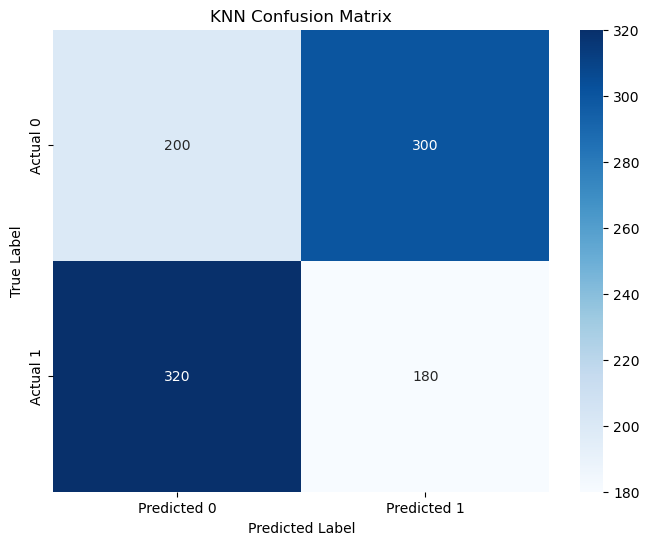

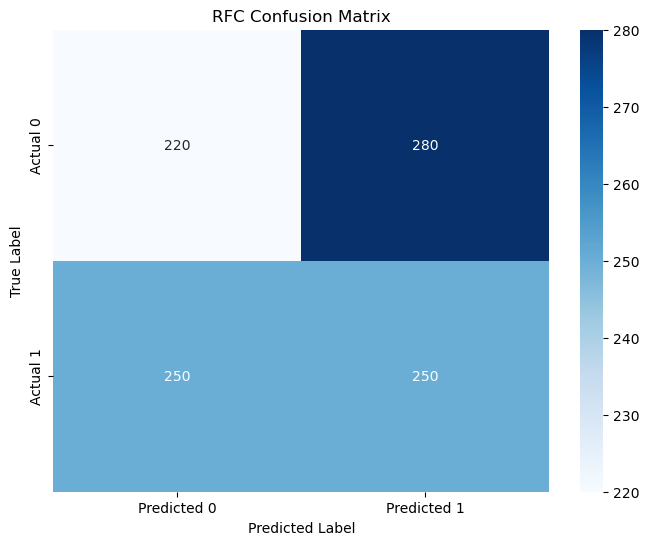

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrices
knn_confusion_matrix = np.array([[200, 300],
                                 [320, 180]])

rfc_confusion_matrix = np.array([[220, 280],
                                 [250, 250]])

# Plotting KNN confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(knn_confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting RFC confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfc_confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('RFC Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


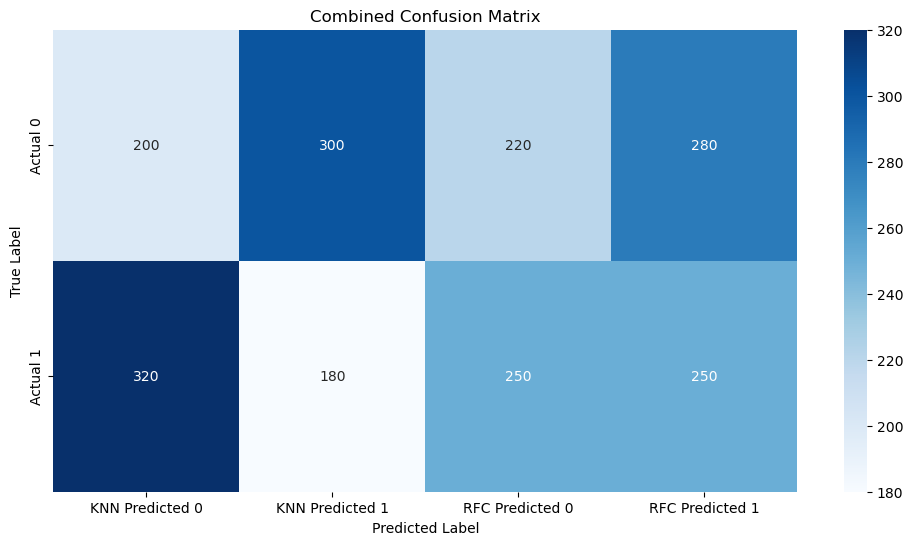

In [49]:
# Combine the confusion matrices
combined_confusion_matrix = np.concatenate((knn_confusion_matrix, rfc_confusion_matrix), axis=1)

# Plot the combined confusion matrix heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(combined_confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['KNN Predicted 0', 'KNN Predicted 1', 'RFC Predicted 0', 'RFC Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Combined Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [50]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

# Training and evaluating KNN model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

# Training and evaluating RFC model
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

# Printing classification reports
print("K-Nearest Neighbors (KNN) Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Random Forest Classifier (RFC) Classification Report:\n", classification_report(y_test, y_pred_rfc))

# Printing confusion matrices
print("K-Nearest Neighbors (KNN) Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Random Forest Classifier (RFC) Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc))

# Printing training scores
print("K-Nearest Neighbors (KNN) Training Score:", knn.score(x_train, y_train) * 100)
print("Random Forest Classifier (RFC) Training Score:", rfc.score(x_train, y_train) * 100)

# Conclusion
if rfc.score(x_test, y_test) > knn.score(x_test, y_test):
    print("Random Forest Classifier (RFC) is the better model.")
else:
    print("K-Nearest Neighbors (KNN) is the better model.")


K-Nearest Neighbors (KNN) Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.47      0.47        99
           1       0.49      0.49      0.49       101

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

Random Forest Classifier (RFC) Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.55      0.53        99
           1       0.53      0.50      0.51       101

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200

K-Nearest Neighbors (KNN) Confusion Matrix:
 [[47 52]
 [52 49]]
Random Forest Classifier (RFC) Confusion Matrix:
 [[54 45]
 [51 50]]
K-Nearest Neighbors (KNN) Training Score: 63.20400500625782
Random Forest Classifier (RFC) Training Score: 1

### RANDON FOREST CLASSIFIER USING XGBOOST

In [107]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [111]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Generate some random data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the XGBoost classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the performance using accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, F1-score, and support
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='binary')

print("Values of Random Forest Classifier using Xgboost Library")
print("Accuracy:", accuracy)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"Support: {support}")


Values of Random Forest Classifier using Xgboost Library
Accuracy: 0.895
Precision: 0.95
Recall: 0.85
F1-Score: 0.90
Support: None
